In [1]:
import pandas as pd
import requests
import bs4
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
import lxml
import html5lib
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
driver = webdriver.Chrome()
url = "https://www.spotrac.com/mlb/payroll/_/year/2025"
driver.get(url)

In [3]:
select = Select(driver.find_element('xpath', r"/html/body/main/div[2]/section/div/div/div[1]/section/article/form/div/div[1]/div[2]/select"))
select.select_by_index(5)
soup = bs4.BeautifulSoup(driver.page_source, "html.parser")
table = soup.select_one('table.dataTable')
df = pd.read_html(str(table))[0]
headers = list(df)
tbody = soup.find("tbody")
rows = tbody.find_all('tr')
data = []
for row in rows:
    # Find all <td> elements in the current row
    cells = row.find_all('td')
    
    # Extract the text from each <td> element
    cell_data = [cell.get_text().strip() for cell in cells]
    data.append(cell_data)
    
    print(cell_data)
df = pd.DataFrame(data, columns=headers)


['1', 'PHI\n\n PHI', '24-16', '30.0', '$282,625,817', '$281,235,784', '$1,225,000', '-', '$53,118']
['2', 'NYM\n\n NYM', '26-15', '29.5', '$324,489,692', '$255,812,098', '$68,368,026', '-', '$288,062']
['3', 'LAD\n\n LAD', '27-14', '30.3', '$332,246,524', '$212,725,880', '$117,397,579', '-', '$73,763']
['4', 'TOR\n\n TOR', '20-20', '29.5', '$246,441,798', '$206,909,641', '$34,447,428', '-', '$3,180,643']
['5', 'TEX\n\n TEX', '20-21', '30.8', '$216,109,228', '$192,173,862', '$22,385,500', '-', '$467,934']
['6', 'CHC\n\n CHC', '23-18', '29.9', '$193,787,681', '$161,464,067', '$26,821,250', '-', '$192,042']
['7', 'NYY\n\n NYY', '23-17', '29.5', '$290,189,465', '$159,534,236', '$117,378,500', '-', '$384,077']
['8', 'SF\n\n SF', '24-17', '28.6', '$170,777,062', '$158,132,527', '$6,330,000', '-', '$314,535']
['9', 'ATL\n\n ATL', '19-21', '29.2', '$213,289,390', '$155,581,160', '$38,770,000', '-', '$6,694,139']
['10', 'ARI\n\n ARI', '21-20', '29.5', '$183,561,643', '$153,737,163', '$29,362,70

/var/folders/jx/n30w97zd1_75l77ctc7sskf40000gn/T/ipykernel_20219/3143215693.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


In [4]:
df

,Rank,Team,Record,Avg Age Team,Total Payroll Allocations,Active 26-Man,Injured,Retained,Buried
0,1,PHI\n\n PHI,24-16,30.0,"$282,625,817","$281,235,784","$1,225,000",-,"$53,118"
1,2,NYM\n\n NYM,26-15,29.5,"$324,489,692","$255,812,098","$68,368,026",-,"$288,062"
2,3,LAD\n\n LAD,27-14,30.3,"$332,246,524","$212,725,880","$117,397,579",-,"$73,763"
3,4,TOR\n\n TOR,20-20,29.5,"$246,441,798","$206,909,641","$34,447,428",-,"$3,180,643"
4,5,TEX\n\n TEX,20-21,30.8,"$216,109,228","$192,173,862","$22,385,500",-,"$467,934"
5,6,CHC\n\n CHC,23-18,29.9,"$193,787,681","$161,464,067","$26,821,250",-,"$192,042"
6,7,NYY\n\n NYY,23-17,29.5,"$290,189,465","$159,534,236","$117,378,500",-,"$384,077"
7,8,SF\n\n SF,24-17,28.6,"$170,777,062","$158,132,527","$6,330,000",-,"$314,535"
8,9,ATL\n\n ATL,19-21,29.2,"$213,289,390","$155,581,160","$38,770,000",-,"$6,694,139"
9,10,ARI\n\n ARI,21-20,29.5,"$183,561,643","$153,737,163","$29,362,700",-,"$437,264"


In [5]:
df_list = []
for i in range(7):
    select = Select(driver.find_element('xpath', r"/html/body/main/div[2]/section/div/div/div[1]/section/article/form/div/div[1]/div[2]/select"))
    select.select_by_index(5+i)
    time.sleep(5)
    soup = bs4.BeautifulSoup(driver.page_source, "html.parser")
    table = soup.select_one('table.dataTable')
    df = pd.read_html(str(table))[0]
    headers = list(df)
    tbody = soup.find("tbody")
    rows = tbody.find_all('tr')
    data = []
    for row in rows:
        # Find all <td> elements in the current row
        cells = row.find_all('td')
    
        # Extract the text from each <td> element
        cell_data = [cell.get_text().strip() for cell in cells]
        data.append(cell_data)
    df = pd.DataFrame(data, columns=headers)
    df["Team"] = df["Team"].str[-3:]
    df_list.append(df)


/var/folders/jx/n30w97zd1_75l77ctc7sskf40000gn/T/ipykernel_20219/3210176464.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
/var/folders/jx/n30w97zd1_75l77ctc7sskf40000gn/T/ipykernel_20219/3210176464.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
/var/folders/jx/n30w97zd1_75l77ctc7sskf40000gn/T/ipykernel_20219/3210176464.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
/var/folders/jx/n30w97zd1_75l77ctc7sskf40000gn/T/ipykernel_20219/3210176464.py:8: FutureWarning: Passing literal html to 'read_html' is deprec

In [6]:
for df in df_list:
    df["wins"] = df["Record"].str.split("-").str[0].astype(int)
    df["losses"] = df["Record"].str.split("-").str[1].astype(int)

In [7]:
for df in df_list:
    df["win%"] = df["wins"] / (df["wins"] + df["losses"])

In [8]:
for df in df_list:
    df["Payroll"] = df["Total Payroll Allocations"].str.replace("$", "").str.replace(",", "").astype(float)

In [9]:
df_list[0]

,Rank,Team,Record,Avg Age Team,Total Payroll Allocations,Active 26-Man,Injured,Retained,Buried,wins,losses,win%,Payroll
0,1,PHI,24-16,30.0,"$282,625,817","$281,235,784","$1,225,000",-,"$53,118",24,16,0.600000,282625817.0
1,2,NYM,26-15,29.5,"$324,489,692","$255,812,098","$68,368,026",-,"$288,062",26,15,0.634146,324489692.0
2,3,LAD,27-14,30.3,"$332,246,524","$212,725,880","$117,397,579",-,"$73,763",27,14,0.658537,332246524.0
3,4,TOR,20-20,29.5,"$246,441,798","$206,909,641","$34,447,428",-,"$3,180,643",20,20,0.500000,246441798.0
4,5,TEX,20-21,30.8,"$216,109,228","$192,173,862","$22,385,500",-,"$467,934",20,21,0.487805,216109228.0
5,6,CHC,23-18,29.9,"$193,787,681","$161,464,067","$26,821,250",-,"$192,042",23,18,0.560976,193787681.0
6,7,NYY,23-17,29.5,"$290,189,465","$159,534,236","$117,378,500",-,"$384,077",23,17,0.575000,290189465.0
7,8,SF,24-17,28.6,"$170,777,062","$158,132,527","$6,330,000",-,"$314,535",24,17,0.585366,170777062.0
8,9,ATL,19-21,29.2,"$213,289,390","$155,581,160","$38,770,000",-,"$6,694,139",19,21,0.475000,213289390.0
9,10,ARI,21-20,29.5,"$183,561,643","$153,737,163","$29,362,700",-,"$437,264",21,20,0.512195,183561643.0


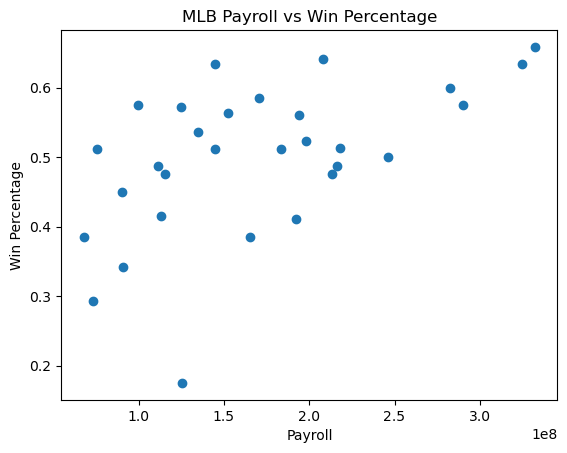

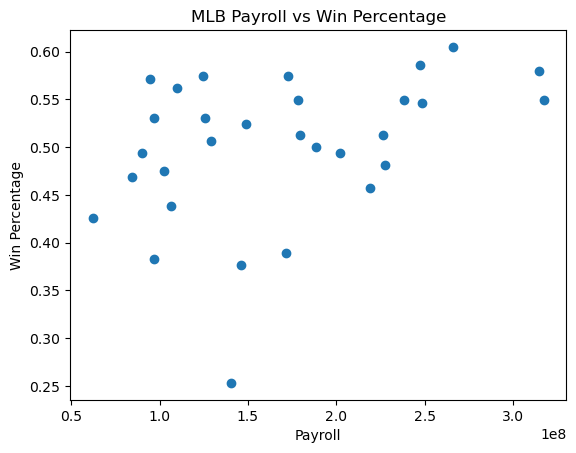

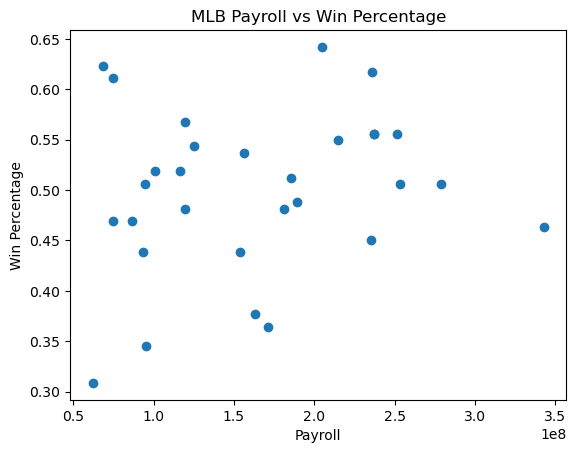

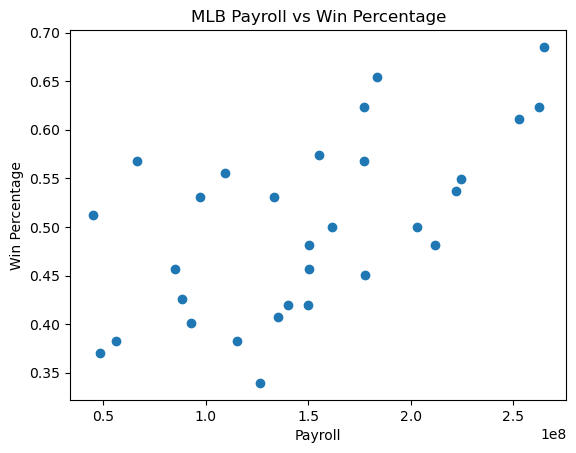

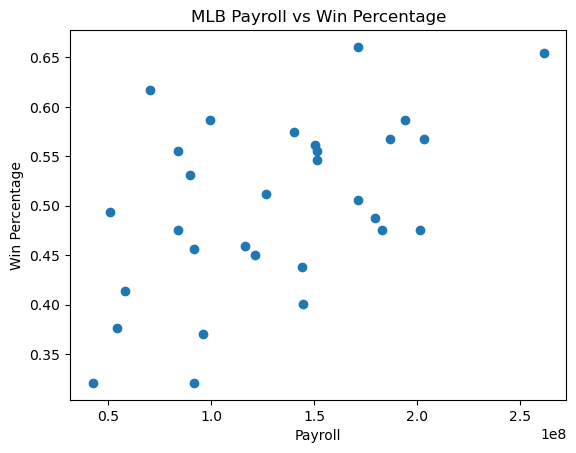

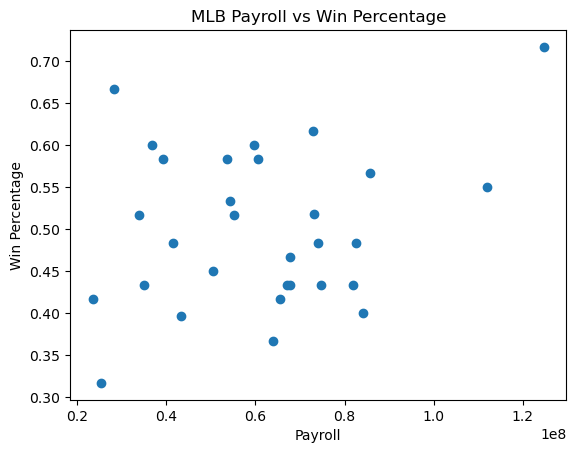

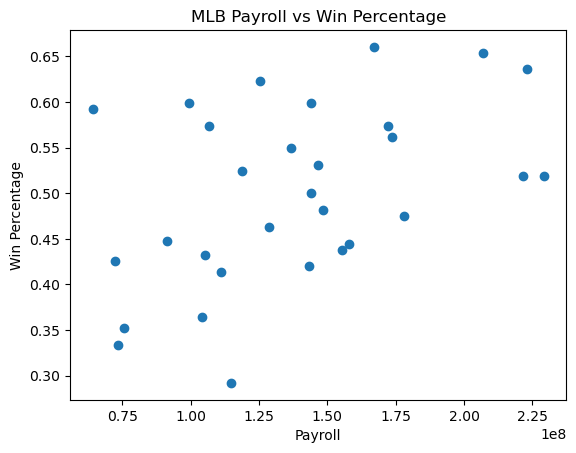

In [10]:
for df in df_list:
    plt.scatter(df["Payroll"], df["win%"])
    plt.xlabel("Payroll")
    plt.ylabel("Win Percentage")
    plt.title("MLB Payroll vs Win Percentage")
    plt.show()
    

In [11]:
full_df = pd.DataFrame()
for df in df_list:
    full_df = pd.concat([full_df, df], ignore_index=True)

In [12]:
full_df

,Rank,Team,Record,Avg Age Team,Total Payroll Allocations,Active 26-Man,Injured,Retained,Buried,wins,losses,win%,Payroll
0,1,PHI,24-16,30.0,"$282,625,817","$281,235,784","$1,225,000",-,"$53,118",24,16,0.600000,282625817.0
1,2,NYM,26-15,29.5,"$324,489,692","$255,812,098","$68,368,026",-,"$288,062",26,15,0.634146,324489692.0
2,3,LAD,27-14,30.3,"$332,246,524","$212,725,880","$117,397,579",-,"$73,763",27,14,0.658537,332246524.0
3,4,TOR,20-20,29.5,"$246,441,798","$206,909,641","$34,447,428",-,"$3,180,643",20,20,0.500000,246441798.0
4,5,TEX,20-21,30.8,"$216,109,228","$192,173,862","$22,385,500",-,"$467,934",20,21,0.487805,216109228.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,26,ARI,85-77,27.5,"$118,672,377","$65,040,742","$11,699,600","$26,307,583","$15,624,452",85,77,0.524691,118672377.0
206,27,TB,96-66,27.3,"$64,178,722","$54,345,374","$644,520","$1,207,595","$104,440",96,66,0.592593,64178722.0
207,28,BAL,54-108,26.5,"$73,328,658","$52,804,601","$9,822,272","$8,602,960","$1,815,309",54,108,0.333333,73328658.0
208,29,TOR,67-95,25.5,"$111,086,139","$36,637,976","$8,512,071","$37,473,700","$584,930",67,95,0.413580,111086139.0


In [13]:
full_df.to_csv("payroll.txt", index=False)